In [210]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.kindpng.com/picc/m/83-836741_logopedia10-paramore-png-logo-transparent-png.png")


<h2>Importando módulos

In [231]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Importando credenciais obtidas em</h3> https://developer.spotify.com/dashboard/

In [212]:
client_id = "coloque a sua aqui"
client_secret = "coloque a sua aqui"
redirect_uri = "http://localhost:8080"


<h3>Definindo o escopo da aplicação.</h3> Apenas leitura

In [213]:
escopo = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=escopo,
                                               client_id=client_id,
                                              client_secret=client_secret,
                                              redirect_uri=redirect_uri))

<h3>Definindo o artista através da id obtida na página do artista no spotify

In [214]:
paramore = sp.artist("74XFHRwlV6OrjEM0A2NCMF")
paramore

{'external_urls': {'spotify': 'https://open.spotify.com/artist/74XFHRwlV6OrjEM0A2NCMF'},
 'followers': {'href': None, 'total': 7271091},
 'genres': ['candy pop', 'pixie', 'pop emo', 'pop punk'],
 'href': 'https://api.spotify.com/v1/artists/74XFHRwlV6OrjEM0A2NCMF',
 'id': '74XFHRwlV6OrjEM0A2NCMF',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5ebb10c34546a4ca2d7faeb8865',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174b10c34546a4ca2d7faeb8865',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178b10c34546a4ca2d7faeb8865',
   'width': 160}],
 'name': 'Paramore',
 'popularity': 77,
 'type': 'artist',
 'uri': 'spotify:artist:74XFHRwlV6OrjEM0A2NCMF'}

<h3>Listando os álbuns do artista na plataforma

In [215]:
paramore_albums = sp.artist_albums(paramore['id'],limit=50)


<h3>Retornando apenas o nome do álbum e seu ID

In [216]:
for album in paramore_albums['items']:
    print(f"Album: {album['name']} -- ID: {album['id']}")

Album: After Laughter -- ID: 1c9Sx7XdXuMptGyfCB6hHs
Album: Paramore (Deluxe Edition) -- ID: 7J2hXOVq8FZ367dTczV7oH
Album: Paramore -- ID: 4sgYpkIASM1jVlNC8Wp9oF
Album: Brand New Eyes -- ID: 27UqZoE1kV6sIV6uQcI28A
Album: The Final Riot! -- ID: 2O5UJpwxMKjhnoe5YVkEcY
Album: Riot! -- ID: 3UoOO8m0oxxvUHXUKf3qcZ
Album: Riot! -- ID: 71rziY9eLo1tA2dBMxrwhc
Album: All We Know Is Falling -- ID: 67f6SSb8yKduNCK15DsafC
Album: This Is Why -- ID: 1BDj5lr0KVcSQpSNdyqJct
Album: Rose-Colored Boy (Mix 2) -- ID: 0cqqPw1s7bPamqMPYN6sIs
Album: Fake Happy (Edit) -- ID: 0hTy1W59wxd9eQhgSCsSZ6
Album: Told You So -- ID: 3NyMsz6wskaV27FyP1V1oC
Album: Hard Times -- ID: 7IefnE4Gu6Vwp6wayHxV40
Album: Ain't It Fun Remix EP -- ID: 0qs4D7RaRhi5mq2X9sd8PP
Album: Still into You -- ID: 5mlDG9NLNDK2z7ywl0S9Tu
Album: Now -- ID: 2KTXYh2xQV29rkwS9oYsDB
Album: Singles Club -- ID: 3qMoGzDfT88nl6TY7YqQs1
Album: Monster -- ID: 5R7HaEiSyuBBPReEyfX39C
Album: Ignorance -- ID: 3yrzFvMY394se6kudvIfwv
Album: Decode -- ID: 043vwbrz69

<h3>Removendo duplicidades e álbuns que contenham "Live" no nome

In [217]:
album_names = []
albums = []

for album in paramore_albums['items']:
    album_name = album['name']
    album_id = album['id']
    
    if album_name[:3] not in album_names and "Live" not in album_name and "The Final" not in album_name:
        album_names.append(album_name[:3] )
        albums.append((album_name,album_id))

In [218]:
albums

[('After Laughter', '1c9Sx7XdXuMptGyfCB6hHs'),
 ('Paramore (Deluxe Edition)', '7J2hXOVq8FZ367dTczV7oH'),
 ('Brand New Eyes', '27UqZoE1kV6sIV6uQcI28A'),
 ('Riot!', '3UoOO8m0oxxvUHXUKf3qcZ'),
 ('All We Know Is Falling', '67f6SSb8yKduNCK15DsafC'),
 ('This Is Why', '1BDj5lr0KVcSQpSNdyqJct'),
 ('Rose-Colored Boy (Mix 2)', '0cqqPw1s7bPamqMPYN6sIs'),
 ('Fake Happy (Edit)', '0hTy1W59wxd9eQhgSCsSZ6'),
 ('Told You So', '3NyMsz6wskaV27FyP1V1oC'),
 ('Hard Times', '7IefnE4Gu6Vwp6wayHxV40'),
 ("Ain't It Fun Remix EP", '0qs4D7RaRhi5mq2X9sd8PP'),
 ('Still into You', '5mlDG9NLNDK2z7ywl0S9Tu'),
 ('Now', '2KTXYh2xQV29rkwS9oYsDB'),
 ('Singles Club', '3qMoGzDfT88nl6TY7YqQs1'),
 ('Monster', '5R7HaEiSyuBBPReEyfX39C'),
 ('Ignorance', '3yrzFvMY394se6kudvIfwv'),
 ('Decode', '043vwbrz69dFkM7LL5bBo2'),
 ('I Caught Myself', '4DkinXgFtxBHXsgZw3iP1k'),
 ("That's What You Get", '4iWtuJCFedlhS9krVidEEI'),
 ('Misery Business', '6QHZdJtz2lht6njuoRVnVI'),
 ("Happy 10's", '58PHPKgCkOhN6PeUZpadpz'),
 ('party songs everyone

<h3>Limpando a lista para exibir apenas os álbuns de inéditas

In [219]:
final_list = albums[:5]
final_list.append(albums[13])

In [220]:
final_list

[('After Laughter', '1c9Sx7XdXuMptGyfCB6hHs'),
 ('Paramore (Deluxe Edition)', '7J2hXOVq8FZ367dTczV7oH'),
 ('Brand New Eyes', '27UqZoE1kV6sIV6uQcI28A'),
 ('Riot!', '3UoOO8m0oxxvUHXUKf3qcZ'),
 ('All We Know Is Falling', '67f6SSb8yKduNCK15DsafC'),
 ('Singles Club', '3qMoGzDfT88nl6TY7YqQs1')]

<h3>Listando as músicas presentes nos álbuns


In [221]:
paramore_song_ids = []

for album_name, album_id in final_list:
    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_name = track['name']
        track_id = track['id']
        paramore_song_ids.append((album_name,album_id,track_name,track_id))

<h3>Filtrando pelas músicas do álbum favorito

In [222]:
filter_brand_new_eyes=[]
for i in paramore_song_ids:
    if 'Brand New Eyes'in i:
        filter_brand_new_eyes.append(i)
filter_brand_new_eyes

[('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'Careful',
  '63L9AjBDN3SOMbJlBkFqiZ'),
 ('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'Ignorance',
  '47No93LxERvV6MtOAmQzHS'),
 ('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'Playing God',
  '7hInOqJnlEayXao08yVYAn'),
 ('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'Brick by Boring Brick',
  '1a9YW7fATU351ok4zWjU7a'),
 ('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'Turn It Off',
  '0q99swv2f9L5m8JHkF3sDC'),
 ('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'The Only Exception',
  '7JIuqL4ZqkpfGKQhYlrirs'),
 ('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'Feeling Sorry',
  '2F9JloTNvfkIvwXJP0bZUO'),
 ('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'Looking Up',
  '3mzV0WDATjcpzcTNK2TLJw'),
 ('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'Where the Lines Overlap',
  '0ZgpvjwRIwTEUkDPWHhTE3'),
 ('Brand New Eyes',
  '27UqZoE1kV6sIV6uQcI28A',
  'Misguided Ghosts',
  '2VYqkb77OjToeRAnMNd4yU'),
 ('Brand New Eyes',
  '27UqZoE1

<h3>O Spotify possui recursos de machine learning.

In [223]:
df = pd.DataFrame()

for album_name,album_id,track_name, track_id in filter_brand_new_eyes:
    features = sp.audio_features(tracks=[track_id])[0]
    features['album_name'] = album_name
    features['album_id'] = album_id
    features['track_name'] = track_name
    ser = pd.Series(features)
    df = pd.concat([df,ser],axis=1)

In [224]:
df

,0,0,0,0,0,0,0,0,0,0,0
danceability,0.417,0.522,0.583,0.436,0.573,0.452,0.395,0.416,0.445,0.567,0.494
energy,0.945,0.964,0.96,0.942,0.902,0.563,0.928,0.98,0.968,0.266,0.723
key,8,11,1,9,0,4,1,4,4,0,6
loudness,-3.703,-2.645,-3.597,-2.206,-3.209,-6.607,-3.672,-2.175,-3.559,-11.217,-4.559
mode,1,0,0,1,1,1,0,1,1,1,0
speechiness,0.0805,0.095,0.0511,0.0496,0.0299,0.0272,0.0604,0.108,0.103,0.0343,0.0441
acousticness,0.00019,0.00109,0.00105,0.000096,0.000081,0.144,0.000109,0.000125,0.000086,0.73,0.0192
instrumentalness,0.000086,0.000389,0.00003,0.000438,0.000102,0,0.000136,0,0.00202,0.000049,0.0322
liveness,0.2,0.0387,0.0801,0.209,0.304,0.143,0.0938,0.332,0.309,0.116,0.134
valence,0.607,0.51,0.626,0.5,0.304,0.209,0.649,0.612,0.629,0.236,0.152


In [225]:
df = df.transpose().set_index('id')
df.head()[['danceability', 'energy', 'key', 'acousticness','album_name','track_name']]

,danceability,energy,key,acousticness,album_name,track_name
id,,,,,,
63L9AjBDN3SOMbJlBkFqiZ,0.417,0.945,8,0.00019,Brand New Eyes,Careful
47No93LxERvV6MtOAmQzHS,0.522,0.964,11,0.00109,Brand New Eyes,Ignorance
7hInOqJnlEayXao08yVYAn,0.583,0.96,1,0.00105,Brand New Eyes,Playing God
1a9YW7fATU351ok4zWjU7a,0.436,0.942,9,0.000096,Brand New Eyes,Brick by Boring Brick
0q99swv2f9L5m8JHkF3sDC,0.573,0.902,0,0.000081,Brand New Eyes,Turn It Off


<h3>Analisando as músicas


In [226]:
df.columns


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'album_name', 'album_id', 'track_name'],
      dtype='object')

In [227]:
data_features = df.drop(['type', 'uri', 'track_href', 'analysis_url','album_name', 'album_id', 'track_name'],axis=1)

In [228]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]


,danceability,energy,key,loudness,mode,speechiness,acousticness
count,11.000,11.000,11,11.000,11,11.0000,11.00000
unique,11.000,11.000,7,11.000,2,11.0000,11.00000
top,0.417,0.945,4,-3.703,1,0.0805,0.00019
freq,1.000,1.000,3,1.000,7,1.0000,1.00000


In [229]:
for col in data_features.columns:
    data_features[col] = data_features[col].apply(float)

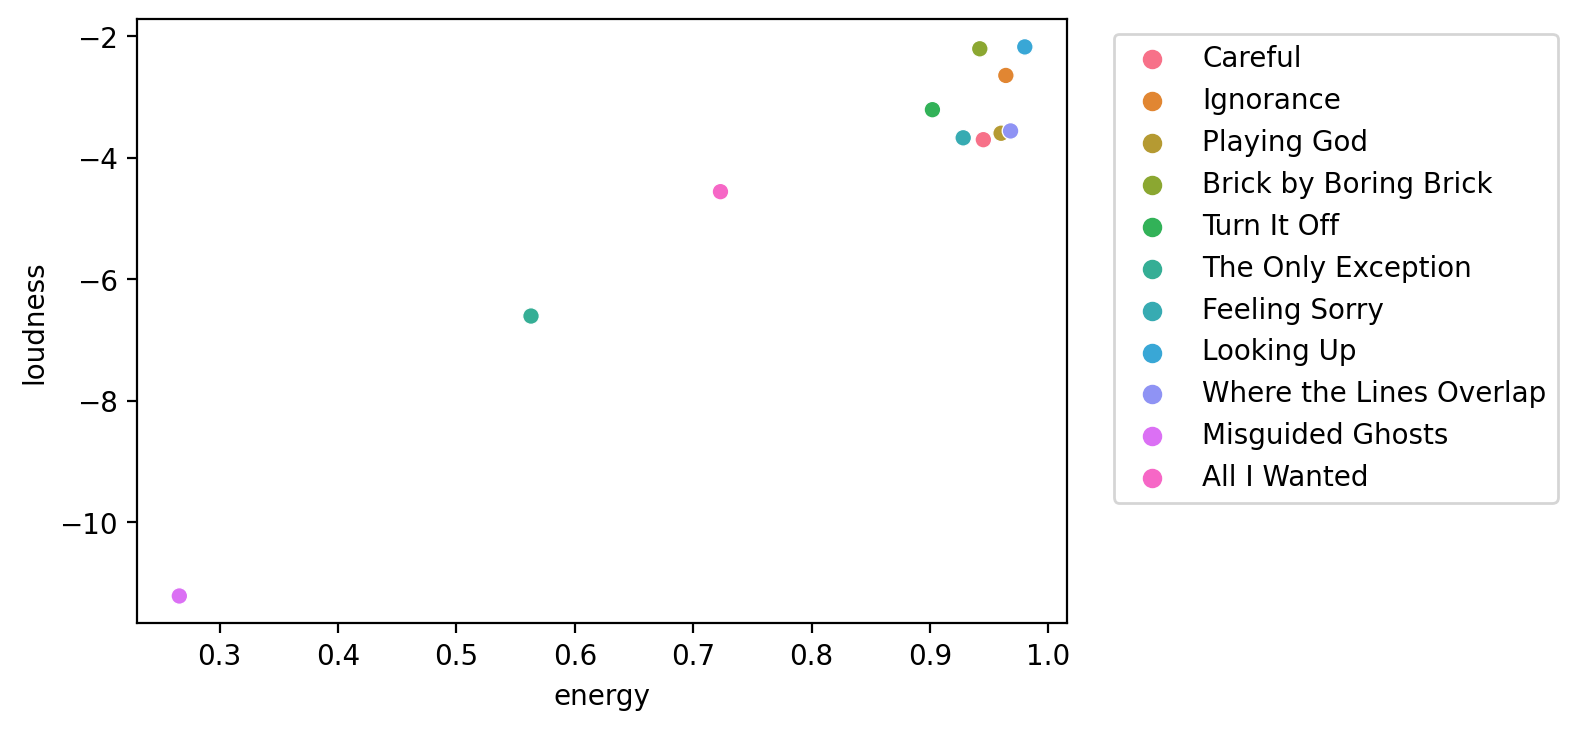

In [230]:
plt.figure(dpi=200)
sns.scatterplot(x='energy',y='loudness',data=data_features,hue=df['track_name'])
plt.legend(loc=(1.05,0.2))